In [13]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp, solve_bvp
from scipy.optimize import minimize

In [14]:
def first_model():
    
    n = 5
    # K = 2/3
    alpha_values = np.random.rand(5) / 10
    # alpha_values = np.array([0
    # .4, 0.4, 0.4, 0.4, 0.4])
    beta_values = np.random.rand(5, 5) /10
    # beta_values = (beta_values + beta_values.T) / 2
    
    
    def ode(t, y):
        dydt = np.zeros(5)
        # if t >= 60 and t <= 70:
        #     index = np.argmax(y)
        #     temp_alpha = alpha_values[index]
        #     alpha_values[index] = 0
        # for i in range(5):
        #     dydt[i] = y[i] * (alpha_values[i] * (1 - y[i] / K) - np.sum([beta_values[i, j] * y[j] for j in range(5) if j != i]))
        K = 2/3
        for i in range(5):
            dydt[i] = y[i] * alpha_values[i]*(1 - np.sum([beta_values[i, j] * y[j] for j in range(5) if j != i])/K)
        # if t >= 60 and t <= 70:
        #     alpha_values[index] = temp_alpha
        return dydt

    t0 = 0
    tf = 240
    x_space = np.linspace(0, tf, 100)
    
    #Define y0 and solution
    y0 = np.array([0.2, 0.2, 0.2, 0.2, 0.2])
    sol = solve_ivp(ode, (t0, tf), y0, t_eval=np.linspace(t0, tf, 100))
    sol.y = sol.y / np.sum(sol.y, axis=0)
    
    #Plot the system
    plt.plot(x_space, sol.y[0],  label=f"Company 1, alpha = {alpha_values[0]:.2f}")
    plt.plot(x_space, sol.y[1],  label=f"Company 2, alpha = {alpha_values[1]:.2f}")
    plt.plot(x_space, sol.y[2],  label=f"Company 3, alpha = {alpha_values[2]:.2f}")
    plt.plot(x_space, sol.y[3],  label=f"Company 4, alpha = {alpha_values[3]:.2f}")
    plt.plot(x_space, sol.y[4],  label=f"Company 5, alpha = {alpha_values[4]:.2f}")
    plt.ylabel("Proportion of Population")
    plt.legend(loc='upper right')
    plt.xlabel("T (days)")
    plt.title("Modelling the Market Share 5 Companies:")
    plt.ylim(0, 1)
    plt.show()

In [15]:
first_model()

KeyboardInterrupt: 

In [ ]:
def first_model():
    
    n = 5
    #K = 2/3
    alpha_values = np.random.rand(5) / 10
    # alpha_values = np.array([0
    # .4, 0.4, 0.4, 0.4, 0.4])
    beta_values = np.random.rand(5, 5) /10
    # beta_values = (beta_values + beta_values.T) / 2
    
    
    def ode(t, y):
        dydt = np.zeros(5)
        # if t >= 60 and t <= 70:
        #     index = np.argmax(y)
        #     temp_alpha = alpha_values[index]
        #     alpha_values[index] = 0
        # for i in range(5):
        #     dydt[i] = y[i] * (alpha_values[i] * (1 - y[i] / K) - np.sum([beta_values[i, j] * y[j] for j in range(5) if j != i]))
        K = 2/3
        K = 3/2
        for i in range(5):
            dydt[i] = y[i] * alpha_values[i]*(1 - np.sum([beta_values[i, j] * y[j] for j in range(5) if j != i])/K)
        # if t >= 60 and t <= 70:
        #     alpha_values[index] = temp_alpha
        return dydt

    t0 = 0
    tf = 10000
    x_space = np.linspace(0, tf, 100)
    
    #Define y0 and solution
    y0 = np.array([0.1, 0.2, 0.3, 0.4, 0.0])
    sol = solve_ivp(ode, (t0, tf), y0, t_eval=np.linspace(t0, tf, 100))
    sol.y = sol.y / np.sum(sol.y, axis=0)
    
    #Plot the system
    plt.plot(x_space, sol.y[0],  label=f"Company 1, alpha = {alpha_values[0]:.2f}")
    plt.plot(x_space, sol.y[1],  label=f"Company 2, alpha = {alpha_values[1]:.2f}")
    plt.plot(x_space, sol.y[2],  label=f"Company 3, alpha = {alpha_values[2]:.2f}")
    plt.plot(x_space, sol.y[3],  label=f"Company 4, alpha = {alpha_values[3]:.2f}")
    plt.plot(x_space, sol.y[4],  label=f"Company 5, alpha = {alpha_values[4]:.2f}")
    plt.ylabel("Proportion of Population")
    plt.legend(loc='upper right')
    plt.xlabel("T (days)")
    plt.title("Modelling the Market Share 5 Companies:")
    plt.ylim(0, 1)
    plt.show()

In [ ]:
first_model()

KeyboardInterrupt: 

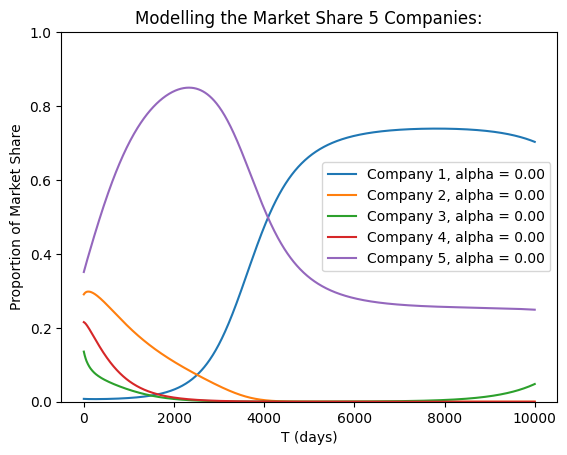

In [ ]:
def event_based_model():
    #np.random.seed(44)
    n = 5
    K = 2/3
    alpha_values = np.random.rand(5) / 100
    # alpha_values = np.array([0.4, 0.4, 0.4, 0.4, 0.4])
    beta_values = np.random.rand(5, 5) / 100
    # beta_values = (beta_values + beta_values.T) / 2
    
    
    def ode(t, y):
        dydt = np.zeros(5)
        temporary_alpha = alpha_values.copy()  
        for i in range(5):
            competitive_term = np.sum([beta_values[i, j] * y[j] for j in range(5) if j != i])
            dydt[i] = y[i] * (temporary_alpha[i] * (1 - y[i] / K) - competitive_term)
        return dydt

    t0 = 0
    tf = 10000
    x_space = np.linspace(0, tf, 1000)
    
    #Define y0 and solution
    #y0 = np.array([0.1, 0.2, 0.3, 0.15, 0.15])
    y0 = np.random.rand(5)
    sol = solve_ivp(ode, (t0, tf), y0, t_eval=np.linspace(t0, tf, 1000))
    sol.y = sol.y / np.sum(sol.y, axis=0)
    
    #Plot the system
    #Plot the system
    plt.plot(x_space, sol.y[0],  label=f"Company 1, alpha = {alpha_values[0]:.2f}")
    plt.plot(x_space, sol.y[1],  label=f"Company 2, alpha = {alpha_values[1]:.2f}")
    plt.plot(x_space, sol.y[2],  label=f"Company 3, alpha = {alpha_values[2]:.2f}")
    plt.plot(x_space, sol.y[3],  label=f"Company 4, alpha = {alpha_values[3]:.2f}")
    plt.plot(x_space, sol.y[4],  label=f"Company 5, alpha = {alpha_values[4]:.2f}")
    plt.ylabel("Proportion of Market Share")
    plt.xlabel("T (days)")
    plt.title("Modelling the Market Share 5 Companies:")
    plt.ylim(0, 1)
    plt.legend()

    plt.show()
    return sol.y, alpha_values
    
solution = event_based_model()

In [ ]:
solution[1]

array([ 2.90483206e-01,  2.92240360e-01,  2.93683983e-01,  2.94862974e-01,
        2.95829511e-01,  2.96600452e-01,  2.97179265e-01,  2.97579470e-01,
        2.97824327e-01,  2.97946153e-01,  2.97985476e-01,  2.97960219e-01,
        2.97848166e-01,  2.97652296e-01,  2.97377027e-01,  2.97027743e-01,
        2.96610622e-01,  2.96132468e-01,  2.95600551e-01,  2.95022453e-01,
        2.94404997e-01,  2.93747068e-01,  2.93048878e-01,  2.92311752e-01,
        2.91537209e-01,  2.90726941e-01,  2.89882803e-01,  2.89006786e-01,
        2.88101005e-01,  2.87167683e-01,  2.86209134e-01,  2.85227759e-01,
        2.84226031e-01,  2.83206494e-01,  2.82171123e-01,  2.81118600e-01,
        2.80049197e-01,  2.78963571e-01,  2.77862401e-01,  2.76746386e-01,
        2.75616243e-01,  2.74472701e-01,  2.73316505e-01,  2.72148410e-01,
        2.70969179e-01,  2.69779586e-01,  2.68580410e-01,  2.67372440e-01,
        2.66156469e-01,  2.64933299e-01,  2.63703740e-01,  2.62468609e-01,
        2.61228734e-01,  

In [ ]:
solution[0][:, -1].sum()

1.0

In [ ]:
import yfinance as yf
import pandas as pd

In [ ]:
def clean(ticker):
    ydf = yf.download(ticker, interval="1d")
    #ydf.to_csv(f'y{ticker}.csv')
    ydf.to_csv(f'test.csv')

    # btc = pd.read_csv(f'y{ticker}.csv')
    df = pd.read_csv(f'test.csv')
    df = df.drop([0,1])
    df['Date'] = pd.to_datetime(df['Price']).dt.date
    # btc['Date'] = pd.to_datetime(btc['Price']).dt.floor('T')
    df = df.set_index('Date')
    df = df.drop(['Price'], axis = 1)
    df = df.reset_index()
    df['Ticker'] = ticker
    return df

In [ ]:
KO = clean('KO')
PEP = clean('PEP')
KDP = clean('KDP')
MNST = clean('MNST')
CELH = clean('CELH')
#combine data
df = pd.concat([clean('KO'), 
                  clean('PEP'),
                  clean('KDP'),
                  clean('MNST'),
                  clean('CELH')])

df['Date'] = pd.to_datetime(df.Date)
df = df.sort_values('Date')
# df = df.query("Date >=  '2018-10-08'")
#rename and fix dtype
df = df.rename(columns = {'Date': 'date',
                              'Adj Close': 'adj_prc',
                              'Close': 'prc',
                              'High': 'high',
                              'Low': 'low',
                              'Open': 'open',
                              'Volume': 'vol',
                              "Ticker": 'tick'
                            })

df = df.apply(lambda x: x.astype(float) if x.dtype == 'object' and x.name != 'tick' else x)
df.set_index('date',inplace=True)
df.reset_index(inplace = True)
df.dtypes
df

NameError: name 'clean' is not defined

In [ ]:
df.head(15)
df.date.min()

Timestamp('2018-10-08 00:00:00')

In [ ]:
tickers = ["KO", "PEP", "KDP", "MNST", "CELH"]

df = yf.Ticker(["KO", "PEP", "KDP", "MNST", "CELH"]).history(period="1y")

# Print a summary of the data for each ticker
# for ticker, data in df.items():
#     print(f"\nHistorical data summary for {ticker}:")
#     print(f"Date range: {data.index[0]} to {data.index[-1]}")
#     print(f"Number of trading days: {len(data)}")
#     print(f"Latest closing price: ${data['Close'].iloc[-1]:.2f}")
#     print(f"Highest price: ${data['High'].max():.2f}")
#     print(f"Lowest price: ${data['Low'].min():.2f}")
#     print(f"Average daily volume: {data['Volume'].mean():.0f}")


df


AttributeError: 'list' object has no attribute 'upper'

In [ ]:
filename = 

#paths to relevant stock data and feature data
return_data = "/Users/brandonwaits/Documents/Semester 5/FIN 415R/CMJ/msf.parquet"
feature_data = "/Users/brandonwaits/Documents/Semester 5/FIN 415R/CMJ/features.parquet"

monthtly_ret = pd.read_parquet(return_data)
features = pd.read_parquet(feature_data)
df = pd.read_parquet(filename)
df

,permno,date,ncusip,ticker,shrcd,exchcd,siccd,prc,ret,retx,vol,shrout,cfacshr
0,10000,1986-01-31,68391610,OMFGA,10,3,3990,-4.37500,NaN,NaN,1771.0,3680.0,1.0
1,10000,1986-02-28,68391610,OMFGA,10,3,3990,-3.25000,-0.257143,-0.257143,828.0,3680.0,1.0
2,10000,1986-03-31,68391610,OMFGA,10,3,3990,-4.43750,0.365385,0.365385,1078.0,3680.0,1.0
3,10000,1986-04-30,68391610,OMFGA,10,3,3990,-4.00000,-0.098592,-0.098592,957.0,3793.0,1.0
4,10000,1986-05-30,68391610,OMFGA,10,3,3990,-3.10938,-0.222656,-0.222656,1074.0,3793.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4965374,93436,2024-04-30,88160R10,TSLA,11,3,9999,183.28000,0.042608,0.042608,24679392.0,3189196.0,1.0
4965375,93436,2024-05-31,88160R10,TSLA,11,3,9999,178.08000,-0.028372,-0.028372,16613245.0,3189196.0,1.0
4965376,93436,2024-06-28,88160R10,TSLA,11,3,9999,197.88000,0.111186,0.111186,14001225.0,3194640.0,1.0
4965377,93436,2024-07-31,88160R10,TSLA,11,3,9999,232.07001,0.172781,0.172781,29287946.0,3194640.0,1.0


In [ ]:
df.loc["Ticker == KO"]

KeyError: 'Ticker == KO'